# Gráficos de séries temporais

## Dados históricos

### Consumo residencial de eletricidade do Brasil

- Trata-se de dados referentes ao consumo residencial de energia em MWz hora do Brasil de 2004 a 2022.
- Dados obtidos em: https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica

### Índice de Atividade Econômica do Banco Central, conhecido como IBC-Br

- Dados de Índice de Atividade Econômica do Banco Central, conhecido como IBC-Br
- Disponível em: https://dadosabertos.bcb.gov.br/dataset/24363-indice-de-atividade-economica-do-banco-central---ibc-br

O Índice de Atividade Econômica do Banco Central, conhecido como IBC-Br, é um indicador mensal que busca mensurar a atividade econômica do país. Ele é calculado pelo Banco Central do Brasil e serve como uma ferramenta para acompanhar o desempenho da economia nacional em tempo real.

O IBC-Br é considerado um indicador contemporâneo, pois é divulgado com frequência mensal e tem como objetivo fornecer uma visão atualizada da atividade econômica. Ele é construído com base em uma série de indicadores e variáveis econômicas, como produção industrial, vendas no varejo, mercado de trabalho, entre outros.

O indicador é importante porque fornece informações valiosas sobre a saúde da economia do país. Ele pode ser utilizado por analistas econômicos, investidores, empresas e formuladores de políticas públicas para tomar decisões informadas e acompanhar o desempenho econômico ao longo do tempo.

O IBC-Br não deve ser confundido com o Produto Interno Bruto (PIB), que é uma medida mais ampla da atividade econômica e é divulgado trimestralmente. No entanto, o IBC-Br pode ser considerado um indicador antecedente do PIB, pois fornece uma prévia do desempenho econômico antes da divulgação oficial do PIB.

Em resumo, o Índice de Atividade Econômica do Banco Central é um indicador mensal que tem como objetivo medir a atividade econômica do país em tempo real, fornecendo informações valiosas para análise e acompanhamento da economia nacional.

A faixa de valores do Índice de Atividade Econômica do Banco Central (IBC-Br) pode variar ao longo do tempo, dependendo das condições econômicas e do desempenho da economia nacional. O índice é construído de forma a ter uma média de longo prazo igual a 100, e os valores absolutos podem variar acima e abaixo desse nível de referência.

No entanto, é importante ressaltar que não existe uma faixa de valores fixa para o IBC-Br que seja considerada como "normal" ou "aceitável". O índice é mais relevante para análise quando é comparado a períodos anteriores ou quando é observada uma tendência consistente ao longo do tempo. Variações significativas do índice, tanto para cima quanto para baixo, podem indicar mudanças na atividade econômica e no crescimento do país.


### Tratamento de dados

#### Consumo de eletricidade

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [22]:
consumo = pd.read_excel('consumo_residencial_energia.xlsx')
for i in range(len(consumo)):
    if i > 0:
        if ~pd.isna(consumo.loc[i-1, 'ano']) & pd.isna(consumo.loc[i, 'ano']):
            consumo.loc[i, 'ano'] = consumo.loc[i-1, 'ano']
consumo = consumo[consumo['mês'] != 'ANO'].reset_index(drop = True)
consumo['ano'] = consumo.ano.apply(int)
consumo = consumo.rename(columns={"mês": "mes"})
consumo['ano'] = consumo.ano.apply(int)
consumo = consumo.rename(columns={"mês": "mes"})
consumo['mes'] = consumo.mes.str.replace('JAN', '1')
consumo['mes'] = consumo.mes.str.replace('FEV', '2')
consumo['mes'] = consumo.mes.str.replace('MAR', '3')
consumo['mes'] = consumo.mes.str.replace('ABR', '4')
consumo['mes'] = consumo.mes.str.replace('MAI', '5')
consumo['mes'] = consumo.mes.str.replace('JUN', '6')
consumo['mes'] = consumo.mes.str.replace('JUL', '7')
consumo['mes'] = consumo.mes.str.replace('AGO', '8')
consumo['mes'] = consumo.mes.str.replace('SET', '9')
consumo['mes'] = consumo.mes.str.replace('OUT', '10')
consumo['mes'] = consumo.mes.str.replace('NOV', '11')
consumo['mes'] = consumo.mes.str.replace('DEZ', '12')
consumo['mes'] = consumo['mes'].apply(int)
consumo['ano_mes'] = consumo['ano'].apply(str) + '_' + consumo['mes'].apply(str)
consumo = consumo.sort_values(by = ['ano', 'mes']).reset_index(drop = True)

In [30]:
consumo.shape

(228, 4)

In [31]:
consumo.head()

ano  mes   total_mes ano_mes
0  2004    1  6780680.48  2004_1
1  2004    2  6429238.28  2004_2
2  2004    3  6600338.16  2004_3
3  2004    4  6809006.55  2004_4
4  2004    5  6477341.35  2004_5

In [32]:
consumo.to_csv('consumo_residencial_energia_brasil.csv', sep = ";", index = False)

In [7]:
consumo = pd.read_csv('consumo_residencial_energia_brasil.csv', sep = ';')

#### Indicador de atividade econômica - IBC-Br

In [5]:
indicadores = pd.read_csv('dados_ibc.csv', sep = ';')

In [ ]:
# tratar os dados
indicadores['valor'] = indicadores['valor'].str.replace(',', '.')
indicadores['valor'] = indicadores['valor'].apply(float)
indicadores[['dia', 'mes', 'ano']] = indicadores.data.str.split('/', expand=True)
indicadores['ano'] = indicadores['ano'].apply(int)
indicadores['mes'] = indicadores['mes'].apply(int)
indicadores['dia'] = indicadores['dia'].apply(int)
indicadores = indicadores[(indicadores.ano >= 2004) & (indicadores.ano <= 2022)]
indicadores['ano_mes'] = indicadores['ano'].apply(str) + '_' + indicadores['mes'].apply(str)
indicadores = indicadores.sort_values(by = ['ano', 'mes']).reset_index(drop = True)

In [ ]:
indicadores.shape

In [ ]:
indicadores.dtypes

In [ ]:
indicadores.to_csv('dados_ibc.csv', sep = ";", index = False)

## Gráfico de série temporal

O gráfico de linha plotado de uma série temporal pode fornecer várias interpretações e insights sobre os dados. Algumas das interpretações possíveis incluem:

- Tendência: o gráfico pode revelar uma tendência geral nos dados, indicando se eles estão aumentando, diminuindo ou permanecendo estáveis ao longo do tempo.

- Flutuações: o gráfico pode mostrar flutuações e padrões cíclicos nos dados, indicando a presença de sazonalidade ou variações repetitivas em determinados períodos de tempo.

- Padrões de longo prazo: o gráfico pode revelar padrões de longo prazo, como ciclos econômicos ou padrões sazonais anuais, que se repetem ao longo dos anos.

- Outliers: o gráfico pode identificar valores discrepantes (outliers) que se destacam dos padrões gerais da série temporal, indicando eventos incomuns ou excepcionais.

- Mudanças estruturais: o gráfico pode mostrar mudanças abruptas ou estruturais nos dados ao longo do tempo, como mudanças nas tendências, variações na amplitude ou alterações nas características gerais dos padrões.

### Consumo residencial de eletricidade

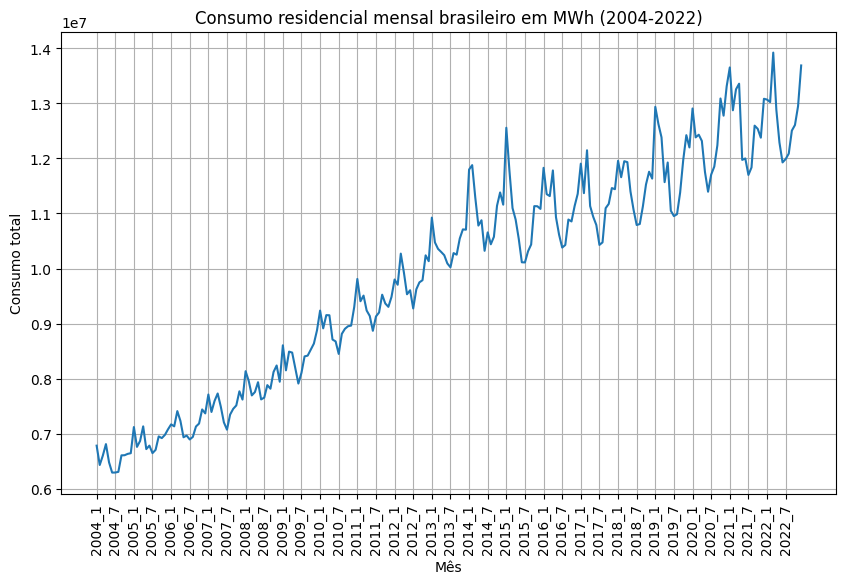

In [166]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=consumo, x="ano_mes", y="total_mes")
plt.title("Consumo residencial mensal brasileiro em MWh (2004-2022)")
plt.xticks(rotation=90)
plt.xlabel("Mês")
plt.ylabel("Consumo total")
plt.grid(True)
plt.xticks(rotation=90)
plt.xticks(range(0, len(indicadores["ano_mes"]), 6))
plt.show()

### Indicador - IBC-Br

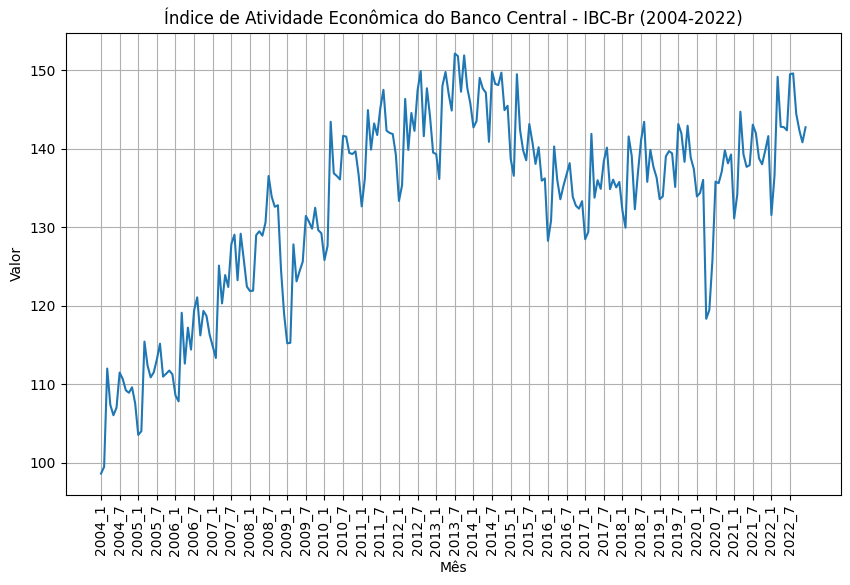

In [164]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=indicadores, x="ano_mes", y="valor")
plt.title("Índice de Atividade Econômica do Banco Central - IBC-Br (2004-2022)")
plt.xticks(rotation=90)
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.grid(True)
plt.xticks(range(0, len(indicadores["ano_mes"]), 6))
plt.show()

In [9]:
anos = consumo.ano.unique()
print(anos)

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [15]:
# dados tabulados
dados_ = []
for ano in anos:
    dados_.append(list(consumo[consumo.ano == ano]['total_mes'].values))
    
df_consumo_tabulado = pd.DataFrame(dados_, index=anos, columns = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
df_consumo_tabulado = df_consumo_tabulado.sort_index()

In [16]:
df_consumo_tabulado .head()

Jan         Fev         Mar         Abr         Mai         Jun  \
2004  6780680.48  6429238.28  6600338.16  6809006.55  6477341.35  6291091.44   
2005  7118537.83  6758333.18  6865215.67  7131738.16  6718147.45  6781275.74   
2006  7167632.08  7131815.55  7408516.95  7229825.78  6933355.68  6963592.81   
2007  7710353.00  7392941.00  7594317.00  7728826.00  7491488.00  7204161.00   
2008  8134240.70  7958717.00  7693600.90  7754681.10  7933880.70  7621230.40   

             Jul         Ago         Set         Out         Nov         Dez  
2004  6292471.02  6304477.14  6604390.05  6606514.00  6631190.28  6643371.33  
2005  6644820.50  6704674.96  6949354.66  6917987.29  6976441.22  7077729.79  
2006  6892915.39  6939971.70  7128370.58  7182235.96  7438708.48  7366884.80  
2007  7071277.00  7344516.00  7449312.00  7511776.00  7768281.00  7618124.00  
2008  7653505.20  7880631.60  7815707.90  8119784.80  8237719.10  7942689.40

In [40]:
df_consumo_tabulado.to_csv('consumo_residencial_energia_brasil_tabulado.csv', sep = ";")

In [10]:
# dados tabulados
dados_ = []
for ano in anos:
    dados_.append(list(indicadores[indicadores.ano == ano]['valor'].values))
    
df_indicadores_tabulado = pd.DataFrame(dados_, index=anos, columns = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
df_indicadores_tabulado = df_indicadores_tabulado.sort_index()

In [11]:
df_indicadores_tabulado .head()

Jan     Fev     Mar     Abr     Mai     Jun     Jul     Ago     Set  \
2004   98.59   99.45  111.98  107.36  106.03  107.00  111.47  110.65  109.21   
2005  103.52  104.00  115.42  112.35  110.86  111.50  113.15  115.15  110.95   
2006  108.55  107.80  119.09  112.61  117.19  114.40  119.41  121.06  116.21   
2007  114.79  113.33  125.11  120.29  123.90  122.38  127.85  129.05  123.24   
2008  121.86  121.91  128.99  129.48  128.92  130.59  136.53  133.87  132.60   

         Out     Nov     Dez  
2004  108.89  109.59  107.56  
2005  111.33  111.73  111.25  
2006  119.33  118.67  116.30  
2007  129.17  125.88  122.43  
2008  132.80  124.58  118.90

In [12]:
df_indicadores_tabulado.to_csv('indicadores_ibc_tabulado.csv', sep = ";")

## Gráfico de linhas sazonal

O gráfico de linha sazonal plotado de uma série temporal pode fornecer várias interpretações e insights sobre a sazonalidade dos dados. Algumas das interpretações possíveis incluem:

- Padrões sazonais: o gráfico pode mostrar padrões repetitivos ao longo do tempo, indicando variações sistemáticas que ocorrem regularmente em determinados períodos sazonais, como estações do ano, meses, semanas ou dias da semana.

- Flutuações regulares: o gráfico pode revelar flutuações regulares com picos e vales que ocorrem em intervalos consistentes, evidenciando a influência sazonal nos dados.

- Variação de amplitude: o gráfico pode mostrar variações na amplitude das oscilações sazonais, indicando se a sazonalidade é consistente ou se varia ao longo do tempo.

- Mudanças sazonais ao longo dos anos: o gráfico pode indicar mudanças nos padrões sazonais ao longo dos anos, como deslocamentos nas datas de início ou término de uma determinada temporada.

- Outliers sazonais: o gráfico pode identificar valores discrepantes (outliers) que ocorrem de forma consistente em determinados períodos sazonais, indicando eventos incomuns ou excepcionais em relação à sazonalidade esperada.

- Comparação entre diferentes sazonalidades: o gráfico pode permitir a comparação de diferentes sazonalidades em séries temporais diferentes, destacando semelhanças ou diferenças nos padrões sazonais.

### Consumo de eletricidade

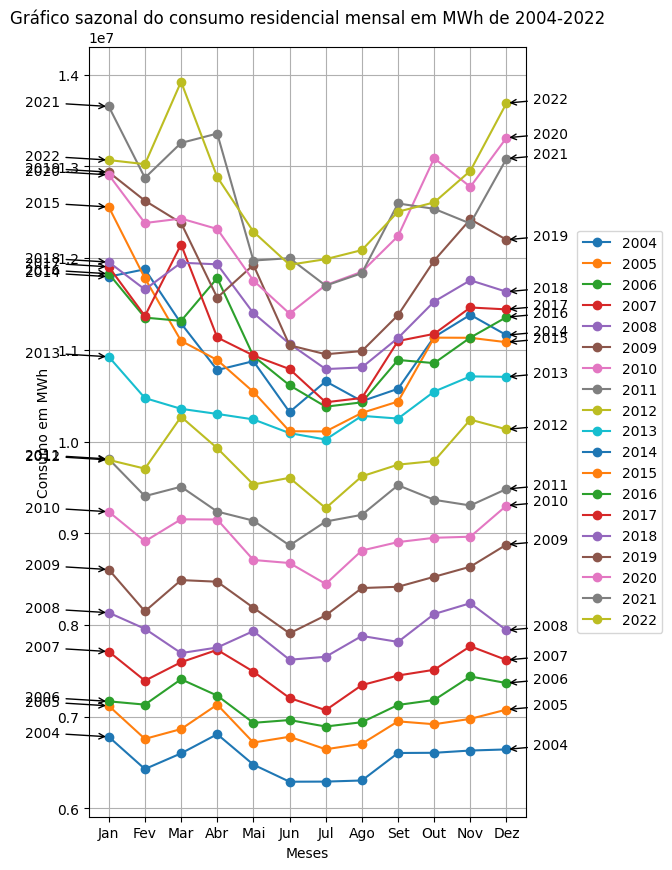

In [46]:
# Plotar o gráfico sazonal
fig, ax1 = plt.subplots(figsize=(5, 10))

# Plotar as linhas para cada ano
for i, ano in enumerate(anos):
    ax1.plot(df_consumo_tabulado.columns, df_consumo_tabulado.loc[ano], marker='o', label=str(ano))
    plt.annotate(ano, (df_consumo_tabulado.columns[11], df_consumo_tabulado.loc[ano][11]), xytext=(19, 0),
             textcoords='offset points', arrowprops=dict(arrowstyle='->'))
    plt.annotate(ano, (df_consumo_tabulado.columns[0], df_consumo_tabulado.loc[ano][0]), xytext=(-60, 0),
             textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Configurar o eixo y primário
ax1.set_xlabel('Meses')
ax1.set_ylabel('Consumo em MWh')
ax1.set_title('Gráfico sazonal do consumo residencial mensal em MWh de 2004-2022')
ax1.grid(True)

# Exibir as legendas das linhas
linhas, labels = ax1.get_legend_handles_labels()
# Configurar a legenda
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# Posicionar a legenda fora do gráfico
plt.subplots_adjust(right=1.0)


# Exibir o gráfico
plt.show()

### Indicador IBC-Br

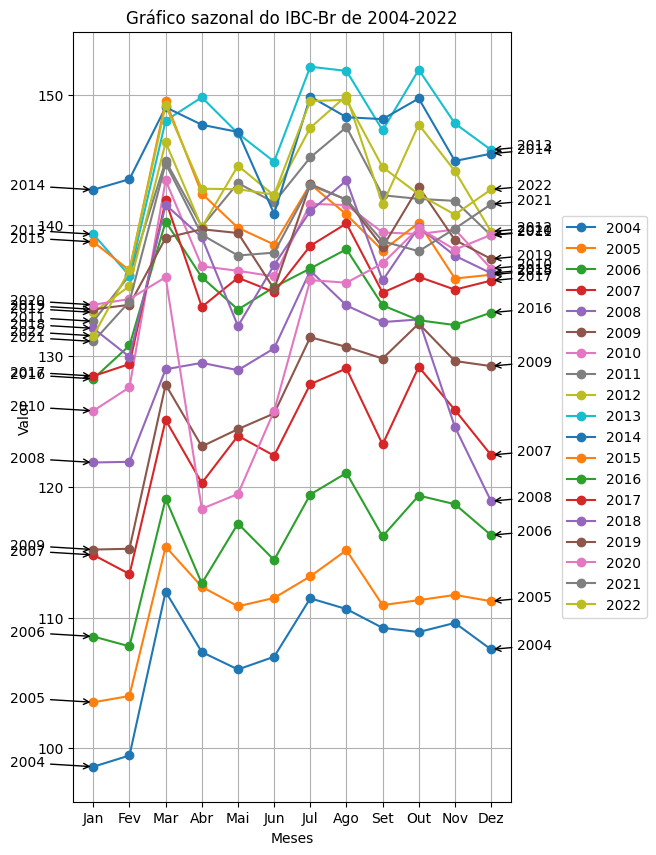

In [77]:
# Plotar o gráfico sazonal
fig, ax1 = plt.subplots(figsize=(5, 10))

# Plotar as linhas para cada ano
for i, ano in enumerate(anos):
    ax1.plot(df_indicadores_tabulado.columns, df_indicadores_tabulado.loc[ano], marker='o', label=str(ano))
    plt.annotate(ano, (df_indicadores_tabulado.columns[11], df_indicadores_tabulado.loc[ano][11]), xytext=(19, 0),
             textcoords='offset points', arrowprops=dict(arrowstyle='->'))
    plt.annotate(ano, (df_indicadores_tabulado.columns[0], df_indicadores_tabulado.loc[ano][0]), xytext=(-60, 0),
             textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Configurar o eixo y primário
ax1.set_xlabel('Meses')
ax1.set_ylabel('Valor')
ax1.set_title('Gráfico sazonal do IBC-Br de 2004-2022')
ax1.grid(True)

# Exibir as legendas das linhas
linhas, labels = ax1.get_legend_handles_labels()
# Configurar a legenda
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# Posicionar a legenda fora do gráfico
plt.subplots_adjust(right=1.0)


# Exibir o gráfico
plt.show()

## Gráfico polar sazonal

o gráfico polar sazonal, também conhecido como gráfico de rosas, é uma representação visual dos padrões sazonais em uma série temporal em coordenadas polares. Ele pode fornecer diversas interpretações sobre a sazonalidade dos dados. Algumas das interpretações possíveis incluem:

- Distribuição sazonal: o gráfico polar mostra a distribuição dos valores ao longo das diferentes épocas sazonais, permitindo identificar quais períodos apresentam maior concentração ou dispersão dos dados.

- Padrões de amplitude: o comprimento dos raios no gráfico polar indica a amplitude dos valores em cada período sazonal. Padrões mais longos podem indicar períodos com valores mais altos ou mais baixos, enquanto padrões mais curtos podem indicar variações menos pronunciadas.

- Direção da sazonalidade: o ângulo em que os raios se estendem no gráfico polar pode indicar a direção preferencial dos valores em cada época sazonal. Por exemplo, se os raios se estendem predominantemente na direção leste, pode indicar um padrão de sazonalidade associado ao nascer do sol ou a eventos específicos ao longo do dia.

- Comparação entre períodos: o gráfico polar permite comparar visualmente as características sazonais entre diferentes anos, meses, semanas ou dias da semana. Isso pode revelar semelhanças ou diferenças nos padrões sazonais ao longo do tempo.

- Anomalias sazonais: o gráfico polar pode destacar anomalias sazonais, como valores excepcionalmente altos ou baixos, que ocorrem em períodos específicos. Essas anomalias podem indicar eventos incomuns ou condições atípicas durante uma determinada época sazonal.

- Simetria e regularidade: o gráfico polar pode revelar a simetria e regularidade dos padrões sazonais. Padrões mais simétricos e regulares indicam uma sazonalidade mais consistente, enquanto padrões irregulares podem indicar flutuações sazonais menos previsíveis.

### Consumo de eletricidade

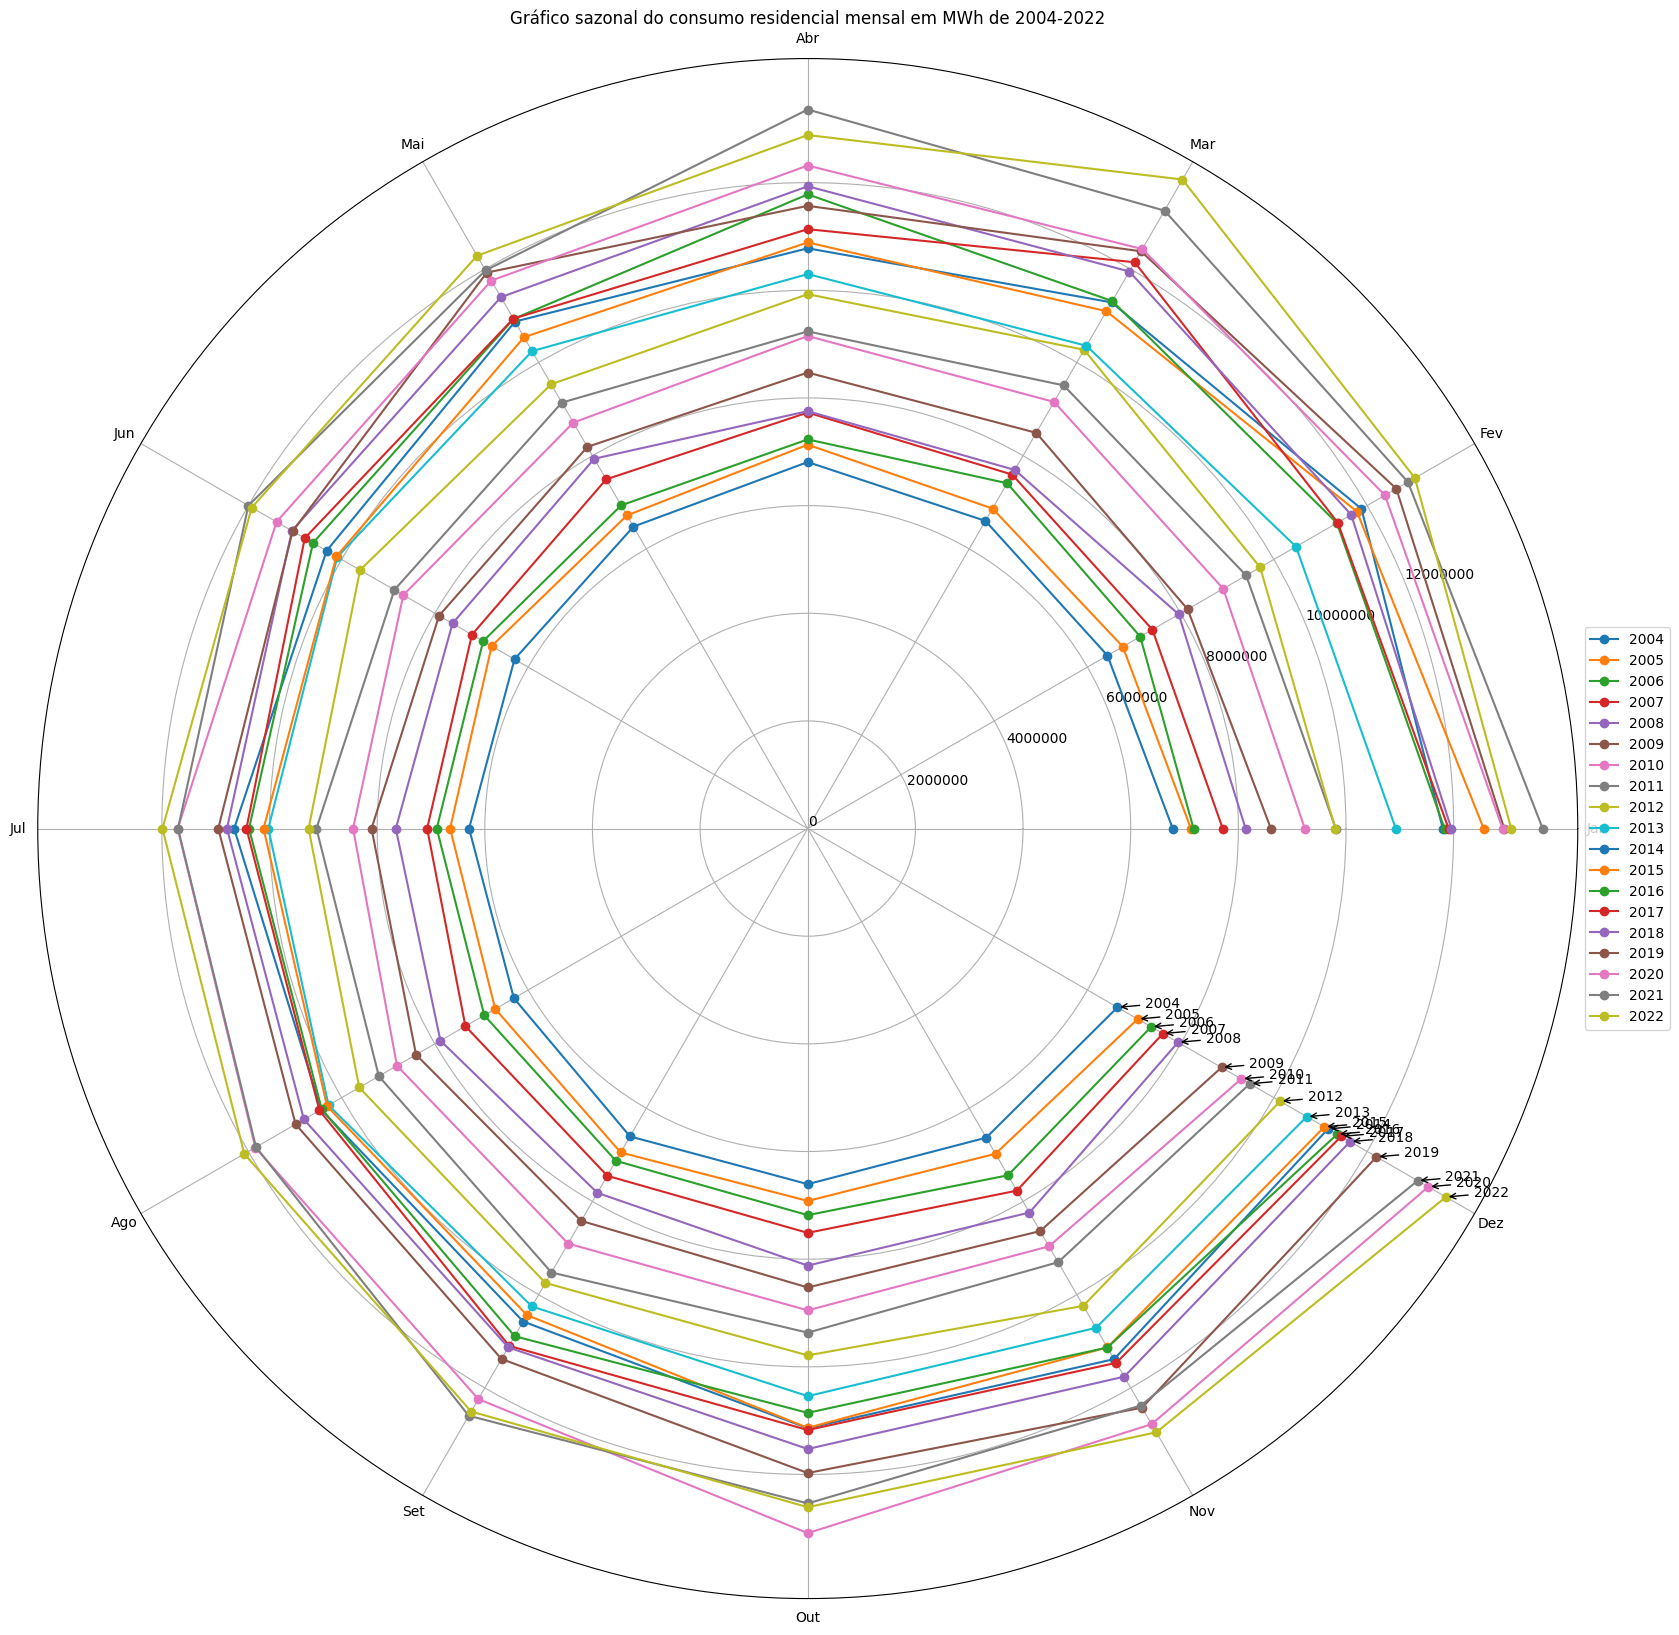

In [17]:
# Dados de exemplo
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Plotar o gráfico sazonal em coordenadas polares
fig = plt.figure(figsize=(20, 20))
ax = plt.subplot(111, polar=True)

# Plotar as linhas para cada ano
for i, ano in enumerate(anos):
    theta = np.linspace(0, 2 * np.pi, len(meses), endpoint=False)
    r = df_consumo_tabulado.loc[ano]
    ax.plot(theta, r, marker='o', label=str(ano))
    #ax.fill_between(theta, 0, r, alpha=0.3, color='blue')
    plt.annotate(ano, (theta[-1], r.iloc[-1]), xytext=(20, 0),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Configurar o ângulo dos rótulos dos meses
ax.set_xticks(theta)
ax.set_xticklabels(meses)

# Configurar o eixo r (distância do centro)
ax.set_yticks(np.arange(0, 14000000, 2000000))
ax.set_yticklabels(np.arange(0, 14000000, 2000000))

# Configurar a legenda
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Configurar o título e os rótulos
plt.title('Gráfico sazonal do consumo residencial mensal em MWh de 2004-2022')
plt.show()

### Indicador IBC-Br

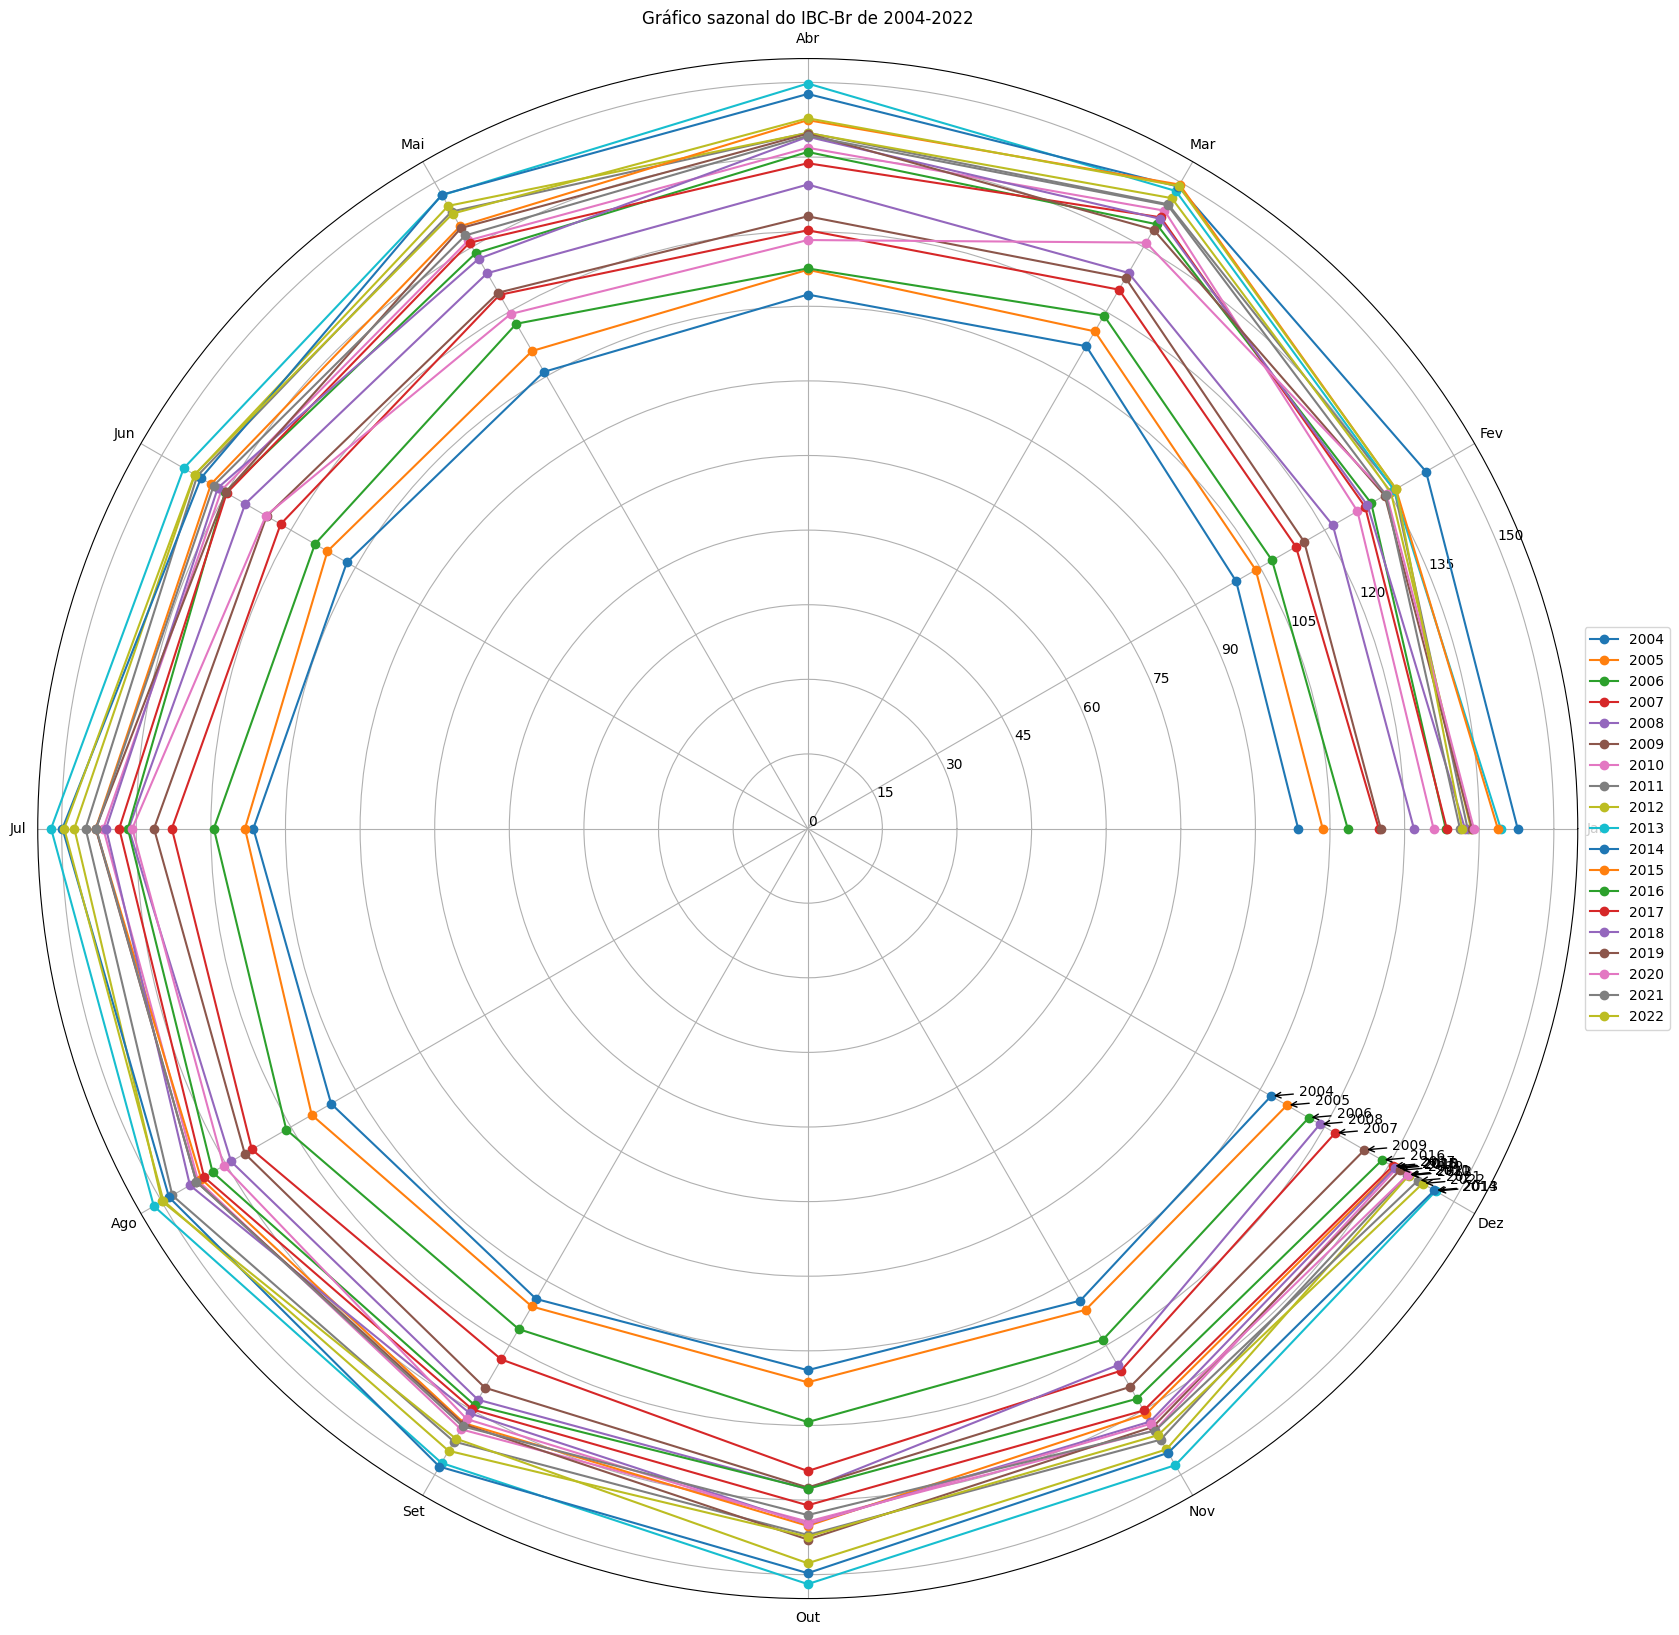

In [14]:
# Dados de exemplo
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Plotar o gráfico sazonal em coordenadas polares
fig = plt.figure(figsize=(20, 20))
ax = plt.subplot(111, polar=True)

# Plotar as linhas para cada ano
for i, ano in enumerate(anos):
    theta = np.linspace(0, 2 * np.pi, len(meses), endpoint=False)
    r = df_indicadores_tabulado.loc[ano]
    ax.plot(theta, r, marker='o', label=str(ano))
    #ax.fill_between(theta, 0, r, alpha=0.3)
    plt.annotate(ano, (theta[-1], r.iloc[-1]), xytext=(20, 0),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Configurar o ângulo dos rótulos dos meses
ax.set_xticks(theta)
ax.set_xticklabels(meses)

# Configurar o eixo r (distância do centro)
ax.set_yticks(np.arange(0, 153, 15))
ax.set_yticklabels(np.arange(0, 153, 15))

# Configurar a legenda
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Configurar o título e os rótulos
plt.title('Gráfico sazonal do IBC-Br de 2004-2022')
plt.show()

## Correlação entre séries temporais

- Consumo de eletricidade residencial x valor do indicador mensal IBC-Br

In [56]:
consumo = pd.read_csv('consumo_residencial_energia_brasil.csv', sep = ';')
indicadores = pd.read_csv('dados_ibc.csv', sep = ';')

In [57]:
consumo_indicadores_merge = consumo.merge(indicadores, on = 'ano_mes', how = 'left')

### Gráfico de dispersão

O gráfico de dispersão plotado com valores de duas séries temporais permite explorar a relação entre essas duas séries. Algumas das interpretações possíveis incluem:

- Correlação: o gráfico de dispersão pode revelar a presença de uma relação linear entre as duas séries. Se os pontos no gráfico se aproximarem de uma linha reta ascendente ou descendente, indica uma correlação positiva ou negativa, respectivamente. Por outro lado, se os pontos estiverem dispersos e não mostrarem uma tendência clara, sugere uma ausência de correlação.

- Padrões sazonais: se houver padrões sazonais nas séries, o gráfico de dispersão pode mostrar como os valores das séries variam entre si em diferentes épocas sazonais. Padrões recorrentes ou ciclos semelhantes podem indicar uma relação sazonal entre as duas séries.

- Tendência: o gráfico de dispersão pode revelar a presença de uma tendência comum entre as duas séries. Se os pontos estiverem alinhados em uma direção ascendente ou descendente, sugere que ambas as séries estão seguindo uma tendência semelhante ao longo do tempo.

- Outliers: observações discrepantes ou valores extremos podem ser identificados no gráfico de dispersão. Esses outliers podem indicar eventos ou condições especiais em que uma série se desvia significativamente da outra.

- Agrupamentos ou agrupamentos densos: o gráfico de dispersão pode mostrar a existência de agrupamentos ou agrupamentos densos de pontos. Isso pode indicar a presença de subgrupos ou padrões específicos que merecem investigação adicional.

- Relação não linear: além da relação linear, o gráfico de dispersão pode revelar outros tipos de relações não lineares, como curvas, U-formas ou formas côncavas. Isso sugere uma possível associação não linear entre as duas séries.

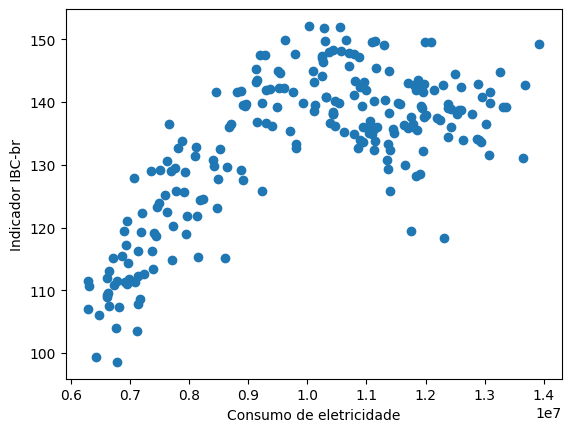

In [58]:
# Plotar o gráfico de dispersão
plt.scatter(consumo_indicadores_merge['total_mes'], consumo_indicadores_merge['valor'])
plt.xlabel('Consumo de eletricidade')
plt.ylabel('Indicador IBC-br')

# Exibir o gráfico
plt.show()

### Matriz de gráfico de dispersão pairplot

O gráfico de matriz de dispersão (pairplot) plotado com valores de duas séries temporais permite explorar as relações entre as duas séries e também entre cada série e ela mesma. Algumas das interpretações possíveis incluem:

- Correlação entre as séries: o pairplot pode revelar a presença de uma relação linear entre as duas séries. Os gráficos de dispersão na diagonal principal mostram a relação entre cada série e ela mesma, enquanto os gráficos de dispersão fora da diagonal mostram a relação entre as duas séries. Se os pontos nos gráficos de dispersão fora da diagonal estiverem alinhados em uma direção ascendente ou descendente, indica uma correlação positiva ou negativa, respectivamente.

- Padrões sazonais e temporais: se houver padrões sazonais ou temporais nas séries, o pairplot pode mostrar como os valores das séries variam entre si em diferentes épocas sazonais ou períodos de tempo. Padrões recorrentes ou ciclos semelhantes podem indicar uma relação sazonal ou temporal entre as duas séries.

- Tendência conjunta: o pairplot pode revelar a presença de uma tendência comum entre as duas séries. Se os pontos nos gráficos de dispersão fora da diagonal estiverem alinhados em uma direção ascendente ou descendente, sugere que ambas as séries estão seguindo uma tendência semelhante ao longo do tempo.

- Outliers e valores extremos: o pairplot pode ajudar a identificar observações discrepantes ou valores extremos nas séries. Esses outliers podem indicar eventos ou condições especiais em que uma série se desvia significativamente da outra.

- Relação não linear: além da relação linear, o pairplot pode revelar outros tipos de relações não lineares, como curvas, U-formas ou formas côncavas. Isso sugere uma possível associação não linear entre as duas séries.

- Relações entre as séries e variáveis adicionais: se houver outras variáveis disponíveis no conjunto de dados, o pairplot pode mostrar as relações entre as séries temporais e essas variáveis adicionais. Isso pode ajudar a identificar possíveis fatores que influenciam ou são influenciados pelas séries temporais.

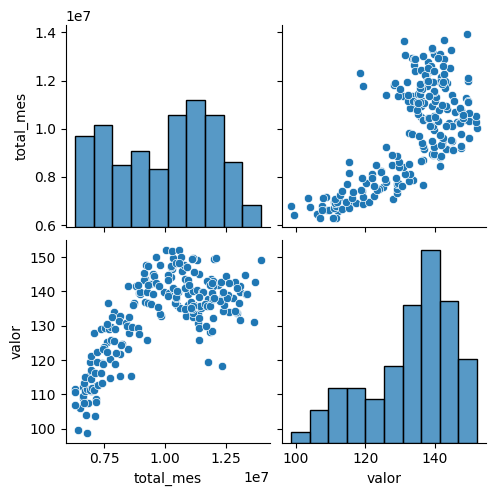

In [59]:
# Plotar os gráficos de dispersão para cada combinação de variáveis
sns.pairplot(consumo_indicadores_merge.iloc[:, [2, 5]], diag_kws={'bins': 10})

# Exibir os gráficos
plt.show()

### Matriz de correlação


Uma matriz de correlação entre valores de duas séries temporais oferece informações sobre a relação linear entre as séries em diferentes momentos no tempo. Algumas das interpretações possíveis incluem:

- Correlação positiva ou negativa: os valores da matriz de correlação indicam se as séries têm uma relação positiva (correlação próxima de +1) ou negativa (correlação próxima de -1). Uma correlação positiva significa que quando uma série aumenta, a outra também tende a aumentar. Por outro lado, uma correlação negativa indica que quando uma série aumenta, a outra tende a diminuir.

- Força da correlação: o valor numérico da correlação indica a força da relação entre as séries. Quanto mais próximo o valor estiver de +1 ou -1, mais forte é a correlação. Valores próximos de 0 indicam uma correlação fraca ou inexistente.

- Padrões sazonais ou temporais: a matriz de correlação pode revelar padrões sazonais ou temporais na relação entre as séries. Por exemplo, pode haver uma alta correlação entre as séries durante certos períodos do ano ou em determinados intervalos de tempo

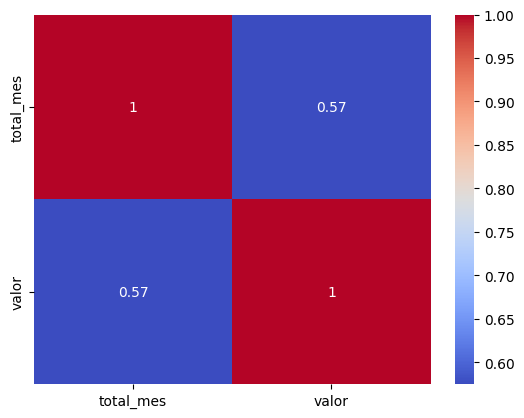

In [61]:
# Selecionar as colunas desejadas (variáveis)
subset = consumo_indicadores_merge.iloc[:, [2, 5]]

# Calcular a matriz de correlação
#kendall, pearson
correlation_matrix = subset.corr(method='spearman')

# Plotar o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Exibir o heatmap
plt.show()

## Gráficos de atraso (lag plot)

Um lag plot, também conhecido como scatter plot de atraso, é uma ferramenta de visualização útil para análise de séries temporais. Ele é usado para explorar a existência de autocorrelação na série temporal e identificar possíveis padrões ou dependências entre observações passadas e futuras.

As possíveis interpretações de um lag plot são:

- Autocorrelação positiva: se os pontos no lag plot se aproximam de uma linha diagonal crescente, indica que existe uma forte autocorrelação positiva na série temporal. Isso significa que as observações passadas têm uma influência significativa nas observações futuras.

- Autocorrelação negativa: se os pontos no lag plot se aproximam de uma linha diagonal decrescente, indica que existe uma forte autocorrelação negativa na série temporal. Isso significa que as observações passadas têm uma influência inversa nas observações futuras.

- Ausência de autocorrelação: se os pontos no lag plot estão dispersos aleatoriamente sem seguir uma tendência clara, indica que não há autocorrelação significativa na série temporal. Isso sugere que as observações passadas não têm influência nas observações futuras.

- Padrões não lineares: além da linha diagonal, padrões não lineares nos pontos do lag plot podem indicar dependências não lineares entre as observações passadas e futuras. Esses padrões podem ser explorados para identificar relações mais complexas na série temporal.

O lag plot é uma ferramenta gráfica útil para analisar a autocorrelação e identificar padrões na série temporal. Ele pode ajudar a identificar possíveis modelos adequados para a análise e previsão da série temporal.

### Consumo de eletricidade

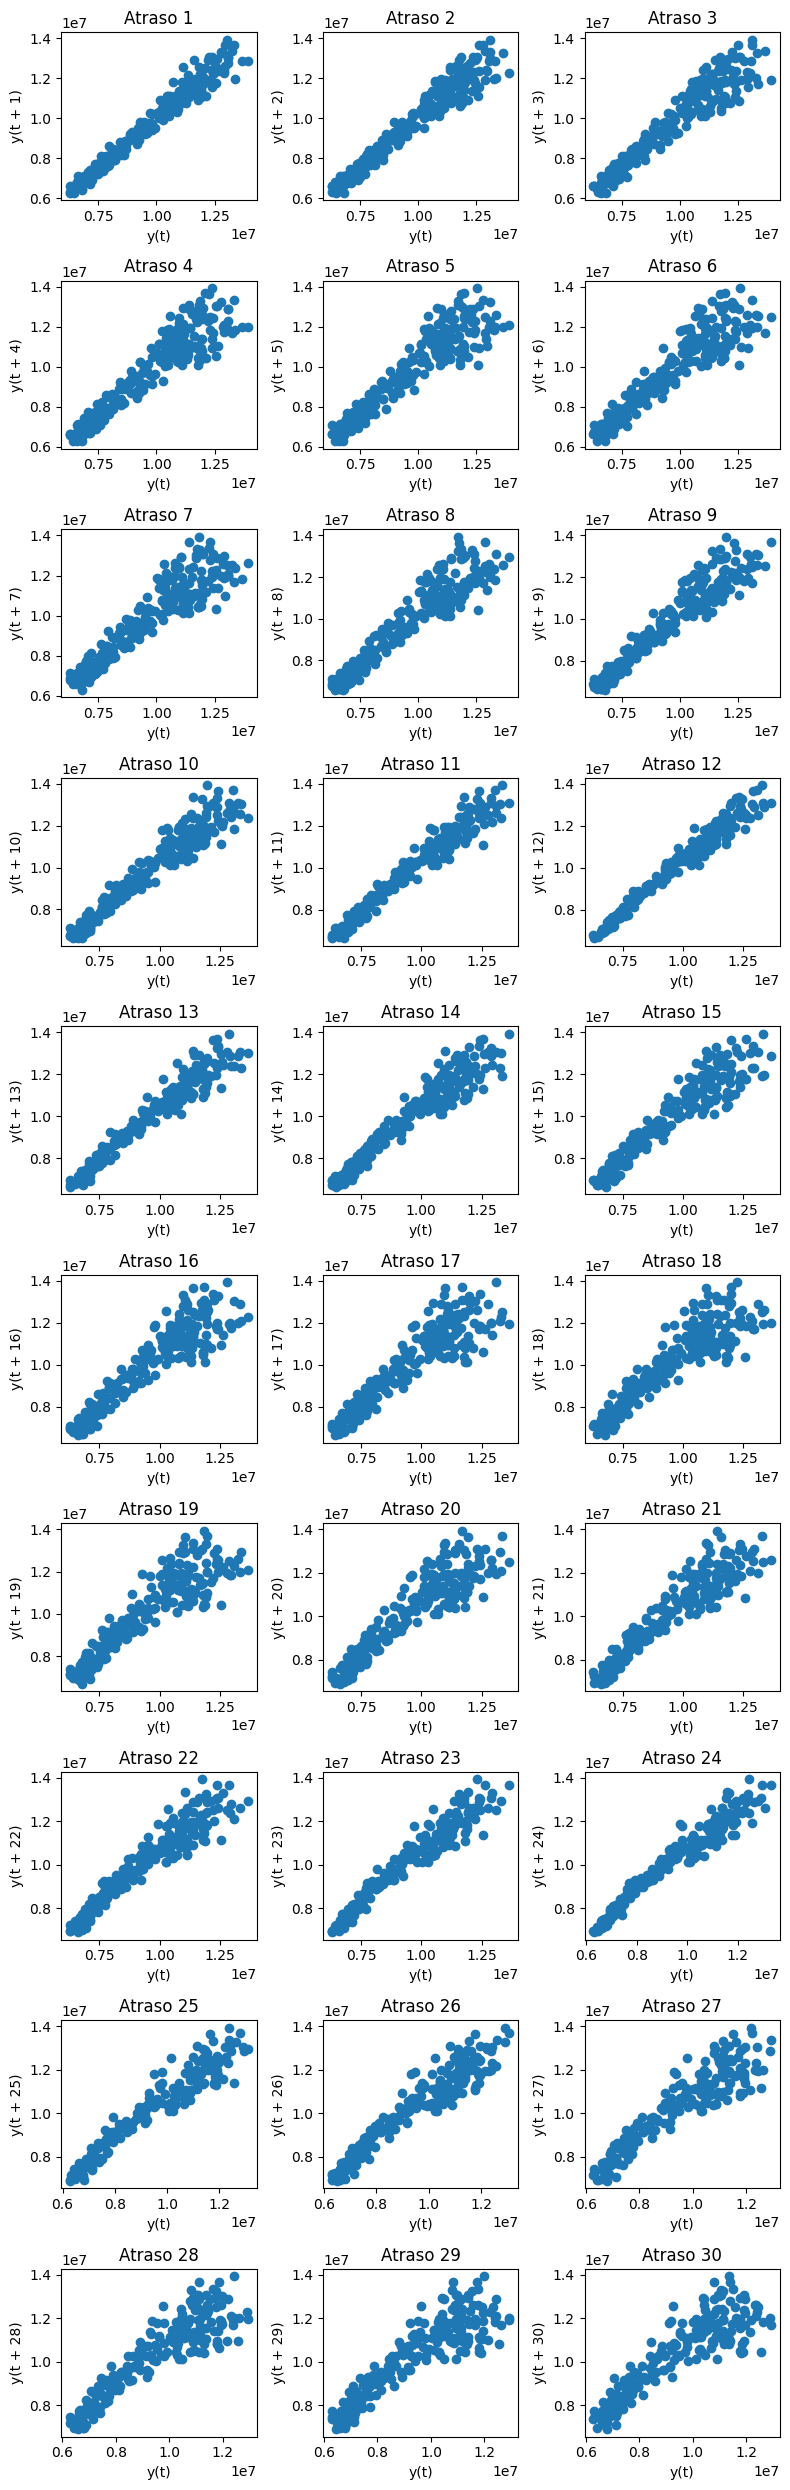

In [125]:
# Criar a matriz de subplots
fig, axs = plt.subplots(10, 3, figsize=(8, 25))

# Lista com os atrasos
atrasos = range(1, 31)

# Iterar sobre os atrasos e plotar os gráficos
for i, atraso in enumerate(atrasos):
    # Calcular o índice dos subplots
    row = i // 3
    col = i % 3
    
    # Plotar o gráfico de atraso
    pd.plotting.lag_plot(consumo.total_mes, lag=atraso, ax = axs[row, col])
    
    # Configurar o título do subplot
    axs[row, col].set_title(f"Atraso {atraso}")
    
# Ajustar a espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Indicador IBC-Br

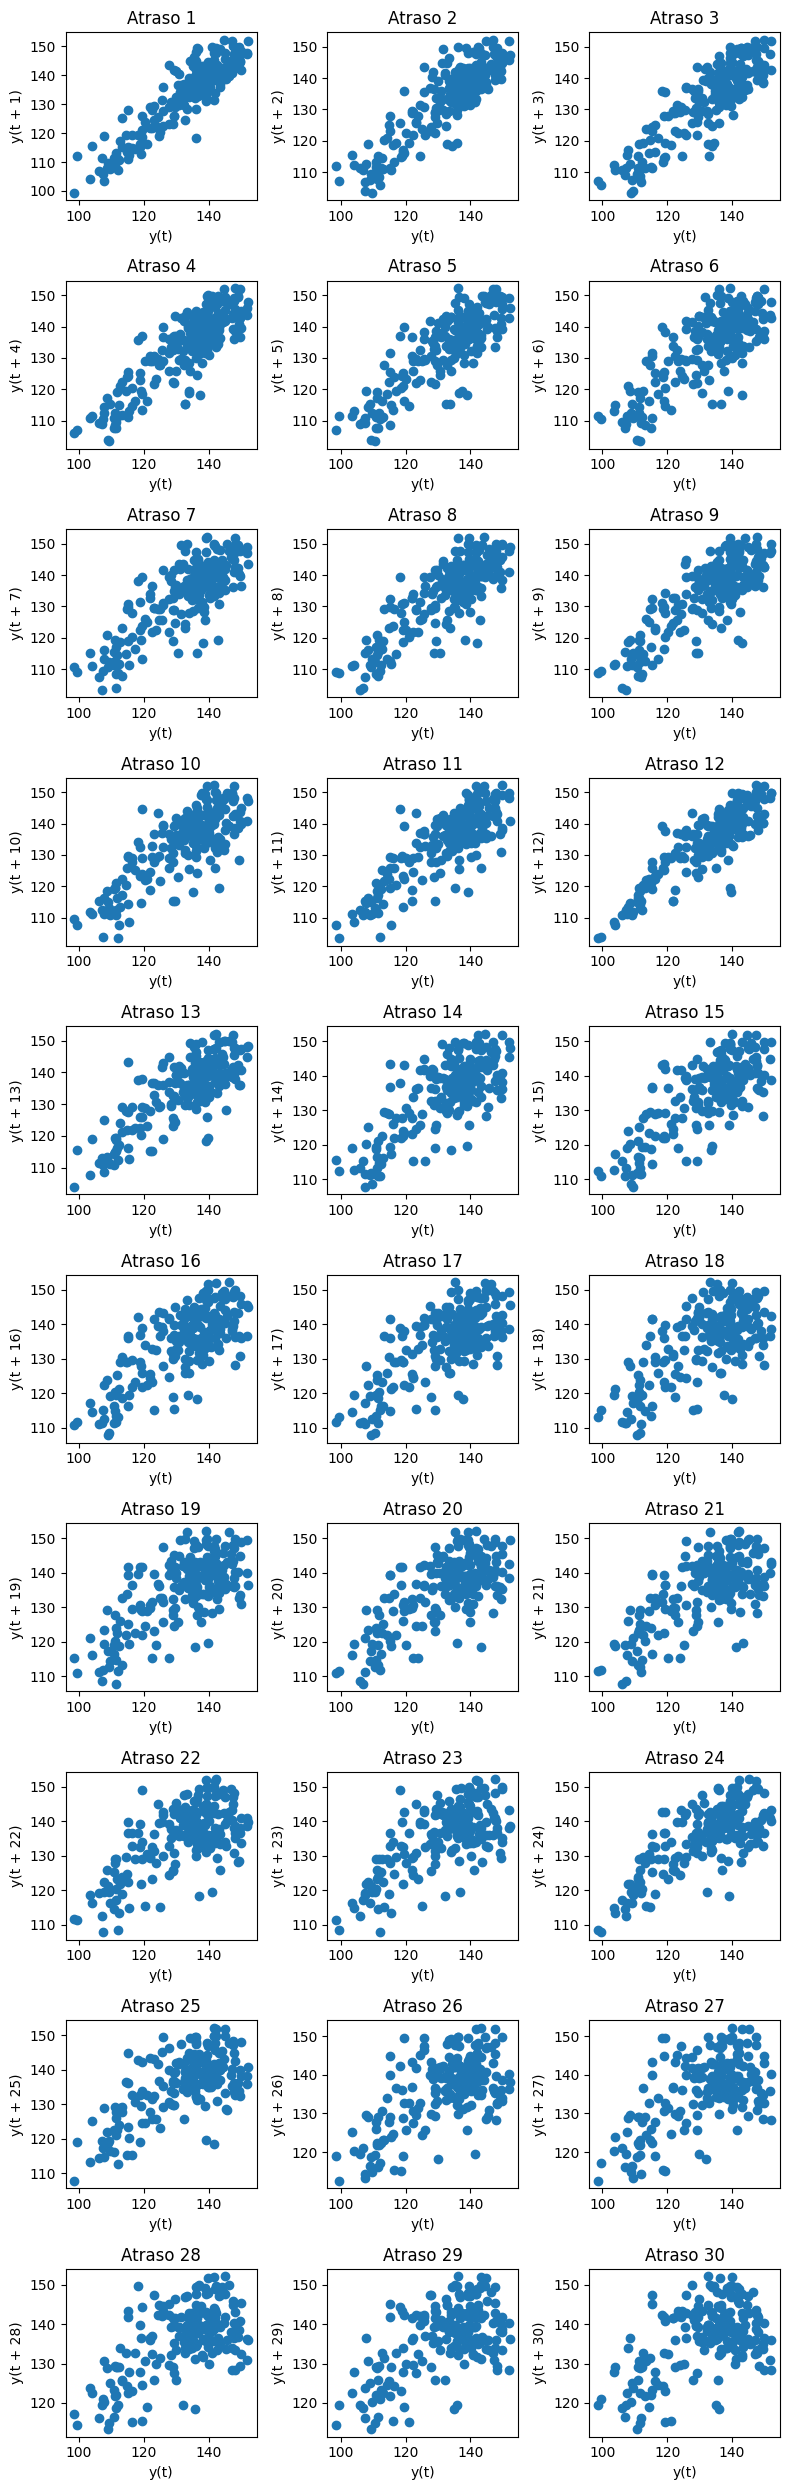

In [126]:
# Criar a matriz de subplots
fig, axs = plt.subplots(10, 3, figsize=(8, 25))

# Iterar sobre os atrasos e plotar os gráficos
for i, atraso in enumerate(atrasos):
    # Calcular o índice dos subplots
    row = i // 3
    col = i % 3
    
    # Plotar o gráfico de atraso
    pd.plotting.lag_plot(indicadores.valor, lag=atraso, ax = axs[row, col])
    
    # Configurar o título do subplot
    axs[row, col].set_title(f"Atraso {atraso}")
    
# Ajustar a espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

## Autocorrelação

### Coeficiente de autocorrelação

Os coeficientes de autocorrelação para atrasos em uma série temporal fornecem informações sobre a relação entre os valores passados e futuros da série. Aqui estão algumas interpretações comuns dos coeficientes de autocorrelação:

- Coeficiente de autocorrelação positivo: um coeficiente positivo indica uma autocorrelação positiva, o que significa que valores altos (ou baixos) tendem a ser seguidos por valores altos (ou baixos) nos períodos subsequentes. Isso sugere uma tendência de persistência na série.

- Coeficiente de autocorrelação negativo: um coeficiente negativo indica uma autocorrelação negativa, o que significa que valores altos (ou baixos) tendem a ser seguidos por valores baixos (ou altos) nos períodos subsequentes. Isso sugere uma tendência de reversão na série.

- Coeficiente de autocorrelação próximo de zero: um coeficiente próximo de zero indica uma autocorrelação fraca ou nula. Isso sugere que não há uma relação clara entre os valores passados e futuros da série.

- Coeficiente de autocorrelação significativo: se um coeficiente de autocorrelação é estatisticamente significativo (com base em testes de significância), isso indica que a autocorrelação observada é improvável de ocorrer apenas por acaso. Isso pode sugerir a presença de padrões ou estrutura na série que são relevantes para a previsão ou análise.

- Coeficiente de autocorrelação decaimento: à medida que o atraso aumenta, é comum observar uma diminuição gradual nos coeficientes de autocorrelação. Isso sugere que a influência dos valores passados diminui à medida que o tempo passa, indicando um processo de memória de curto prazo na série temporal.

É importante observar que a interpretação dos coeficientes de autocorrelação depende do contexto e da natureza da série temporal em análise. Além disso, é recomendável considerar outros métodos estatísticos e técnicas de análise de séries temporais para obter uma compreensão mais completa e precisa das propriedades e padrões da série.

###  Consumo de eletricidade

In [127]:
# Calcule os coeficientes de autocorrelação para atrasos de 1 a 9
serie_array = np.array(consumo.total_mes)

lags = range(1, 31)
acf = [sm.tsa.acf(serie_array, nlags=lag)[lag] for lag in lags]

# Imprima os coeficientes de autocorrelação
for lag, coef in zip(lags, acf):
    print(f"Lag {lag}: {coef}")

Lag 1: 0.9684998883354605
Lag 2: 0.9438944806342661
Lag 3: 0.9188300882463815
Lag 4: 0.8905703064689553
Lag 5: 0.8708821454400894
Lag 6: 0.8593147306878798
Lag 7: 0.8495433130117915
Lag 8: 0.851867413193192
Lag 9: 0.8557593287272356
Lag 10: 0.8511452891048702
Lag 11: 0.8514453270267782
Lag 12: 0.8454239727184996
Lag 13: 0.8216345193527387
Lag 14: 0.8023571476076062
Lag 15: 0.7749223187424126
Lag 16: 0.747011058715662
Lag 17: 0.7294061061380086
Lag 18: 0.7142435600548059
Lag 19: 0.7061073380180893
Lag 20: 0.7069873329508914
Lag 21: 0.7038492721754881
Lag 22: 0.7035160051487003
Lag 23: 0.7021473120305691
Lag 24: 0.6905296012214206
Lag 25: 0.6668379217669412
Lag 26: 0.6469041045313461
Lag 27: 0.6152586154965956
Lag 28: 0.5912565077645208
Lag 29: 0.5704580617920398
Lag 30: 0.5541489853702058


### Indicador IBC-Br

In [117]:
# Calcule os coeficientes de autocorrelação para atrasos de 1 a 9
serie_array = np.array(indicadores.valor)

lags = range(1, 30)
acf = [sm.tsa.acf(serie_array, nlags=lag)[lag] for lag in lags]

# Imprima os coeficientes de autocorrelação
for lag, coef in zip(lags, acf):
    print(f"Lag {lag}: {coef}")

Lag 1: 0.900260098461921
Lag 2: 0.841684326179759
Lag 3: 0.8281096304047288
Lag 4: 0.8101736800540923
Lag 5: 0.7733773581176026
Lag 6: 0.7117249810202372
Lag 7: 0.7294876080305928
Lag 8: 0.7310505750914211
Lag 9: 0.7083035161678509
Lag 10: 0.6844357281922842
Lag 11: 0.6963892635484802
Lag 12: 0.7356668014866592
Lag 13: 0.6573420105883572
Lag 14: 0.6087897077527415
Lag 15: 0.592960861795141
Lag 16: 0.586158885377786
Lag 17: 0.5609293879955612
Lag 18: 0.5011353675626219
Lag 19: 0.5162083897469454
Lag 20: 0.5161710589002743
Lag 21: 0.4881331387057214
Lag 22: 0.46533569520351653
Lag 23: 0.4783666050569175
Lag 24: 0.5053675382750352
Lag 25: 0.43392317737331754
Lag 26: 0.3956796831111676
Lag 27: 0.37306111851139134
Lag 28: 0.37070955183016635
Lag 29: 0.3495733165126019


### Correlograma

No plot_acf do statsmodels, o sombreado azul no correlograma representa a área de confiança ou intervalo de confiança para os coeficientes de autocorrelação. Esse intervalo é comumente definido com um nível de significância de 95%.

A presença do sombreado azul no correlograma é útil para identificar quais coeficientes de autocorrelação são estatisticamente significativos. Se um coeficiente de autocorrelação estiver fora da área sombreada azul, indica que esse coeficiente é estatisticamente diferente de zero e, portanto, é considerado significativo.

O sombreado azul no correlograma mostra a faixa de valores que é esperada para os coeficientes de autocorrelação quando a autocorrelação é devida ao acaso. Qualquer coeficiente de autocorrelação fora dessa faixa sugere uma autocorrelação significativa e não pode ser explicado apenas pelo acaso.

Quando os dados possuem uma tendência, as autocorrelações para atrasos pequenos tendem a ser grandes e positivas, pois as observações próximas no tempo também são próximas em magnitude. Portanto, a função de autocorrelação (ACF) de séries temporais com tendência tende a ter valores positivos que diminuem lentamente à medida que os atrasos aumentam.

Quando os dados são sazonais, as autocorrelações serão maiores para os atrasos sazonais (em múltiplos da frequência sazonal) do que para outros atrasos.

Quando os dados apresentam tanto tendência quanto sazonalidade, é possível observar uma combinação desses efeitos.

A diminuição lenta na ACF à medida que os atrasos aumentam é devida à tendência, enquanto a forma "serrilhada" é devida à sazonalidade.

### Consumo de eletricidade

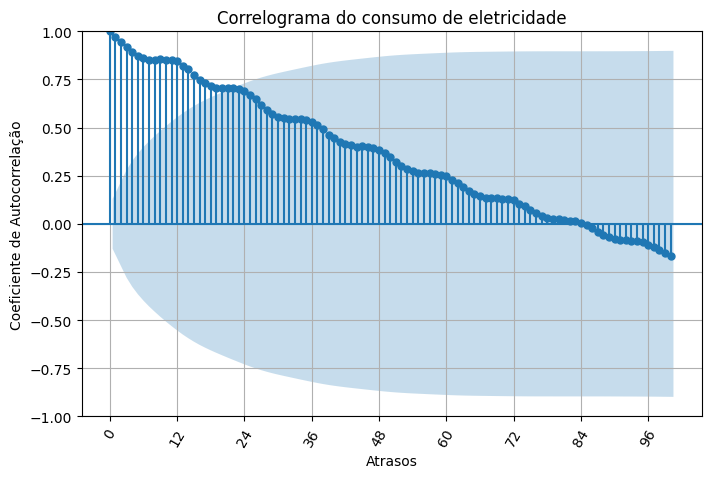

In [150]:
# Plotar o correlograma
serie_array = np.array(consumo.total_mes)

fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(serie_array, lags=100, ax=ax)
plt.xticks(range(0, 100, 12))
plt.xticks(rotation=60)
plt.grid(True)

# Configurar o gráfico
ax.set_xlabel('Atrasos')
ax.set_ylabel('Coeficiente de Autocorrelação')
ax.set_title('Correlograma do consumo de eletricidade')

# Exibir o gráfico
plt.show()

### Indicador IBC-Br

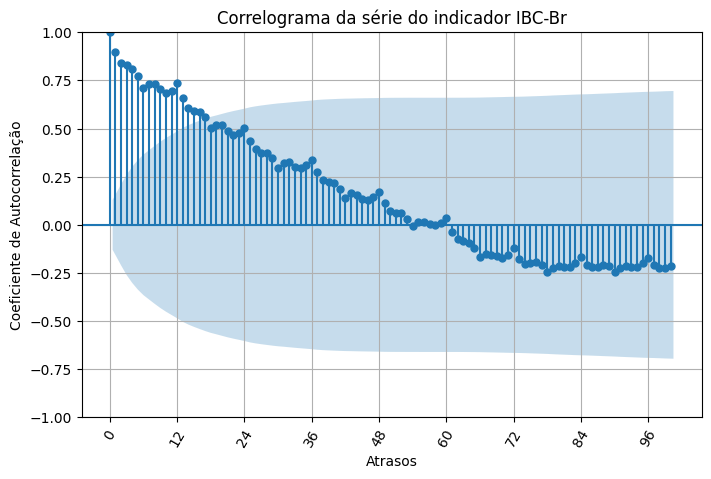

In [151]:
# Plotar o correlograma
serie_array = np.array(indicadores.valor)

fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(serie_array, lags=100, ax=ax)
plt.xticks(range(0, 100, 12))
plt.xticks(rotation=60)
plt.grid(True)

# Configurar o gráfico
ax.set_xlabel('Atrasos')
ax.set_ylabel('Coeficiente de Autocorrelação')
ax.set_title('Correlograma da série do indicador IBC-Br')

# Exibir o gráfico
plt.show()

## Interpretação dos gráficos das séries em questão

### Gráfico de série temporal: dados de consumo residencial mensal brasileiro em MWh (2004-2022):

- A tendência geral dos dados é crescente, ou seja, o consumo está aumentando;
- Parece que há um padrão sazonal anual;
- Há uma mudança de tendência de 2015 para 2016, seguida por uma estabilidade de 2016 à 2018 (com leve crescimento) voltando ao crescimento logo em seguida;

### Gráfico de linhas sazonal: dados de consumo residencial mensal brasileiro em MWh (2004-2022):

- De 2004 a 2013 percebe-se um padrão sazonal mais semelhante a partir de 2014 percebe-se flutuações mais irregulares;
- A partir de 2019 percebe-se maiores variações de amplitude;
- De 2004 a 2013 não há sobreposição evidenciando uma tendência crescente nesse período;
- De 2014 a 2022 percebe-se sobreposições evidenciando um crescimento mais lento;

### Gráfico de série temporal: dados de Índice de Atividade Econômica do Banco Central - IBC-Br (2004-2022)

- Parece que há um padrão sazonal anual;
- Há uma tendência crescente até o primeiro semestre 2008 com uma queda abrupta nesse semestre voltando a crescer a partir de 2009. Esse crescimento vai até o segundo semestre de 2013. Diminui até o início de 2016. Permanece estável de 2016 a 2022 (com um leve crescimento) com uma grande queda no primeiro semestre de 2020 o que pode indicar que a pandemia foi um fator influenciador. Apresentando crescimento a partir de 2022;
- É possível identificar dois outliers, um em 2009 e outro em 2020;

### Gráfico de linhas sazonal: dados de Índice de Atividade Econômica do Banco Central - IBC-Br (2004-2022)

- De 2004 a 2013 há poucas sobreposições evidenciando uma tendência crescente nesse período;
- Há um padrão de crescimento acentuado de fevereiro para março, um padrão de crescimento de junho para julho e um padrão de decrescimento de agosto para setembro;
- A partir de 2014 há muitas sobreposições evidenciando a mudança na estrutura da série temporal;
- Percebe-se em 2009 e 2020 os outliers e as grandes variações de amplitude;

### Gráfico de linhas sazonal

- No gráfico polar sazonal pode-se perceber as mesmas observações feitas no gráfico de linha sazonal.

### Correlação entre séries temporais

- Percebe-se a presença de uma tendência comum entre as duas séries.

### Autocorrelação

- Nas duas séries temporais em questão, a medida que a quantidade de atrasos aumenta o cefeciente de correlação diminui. O coeficiente diminui mais lentamente nos dados de consumo do que nos dados do indicador.
- A diminuição lenta na ACF à medida que os atrasos aumentam é devida à tendência, enquanto a forma "serrilhada" é devida à sazonalidade, portanto, os dados das séries possuem tanto tendência quanto sazonalidade;
- As séries possuem coeficiente de autocorrelação fora da área de confiança ou intervalo de confiança para os coeficientes de autocorrelação, sugerindo uma autocorrelação significativa que não pode ser explicado apenas pelo acaso;
- Percebe-se que as séries em questão não são ruídos brancos;

## Referências

- https://otexts.com/fpp2/